In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [3]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
titanic_df = titanic.copy()
titanic_df = titanic_df[['age','fare','survived']]
titanic_df = titanic_df.dropna()
titanic_df

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
885,39.0,29.1250,0
886,27.0,13.0000,0
887,19.0,30.0000,1
889,26.0,30.0000,1


<function matplotlib.pyplot.show(close=None, block=None)>

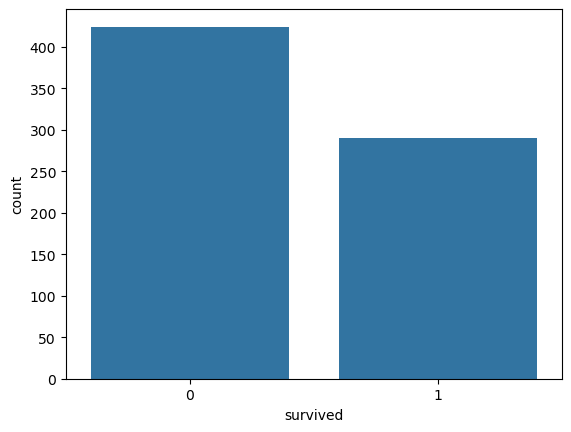

In [17]:
sns.countplot(data=titanic_df, x=titanic_df['survived'])
plt.show

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

logistic_model = LogisticRegression()
logistic_model.fit(scaled_X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
y_predictions = logistic_model.predict(scaled_X_test)
y_predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0], dtype=int64)

In [29]:
logistic_model.coef_

array([[-0.24182496,  0.87794196]])

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.55      0.89      0.68        37
           1       0.67      0.23      0.34        35

    accuracy                           0.57        72
   macro avg       0.61      0.56      0.51        72
weighted avg       0.61      0.57      0.52        72



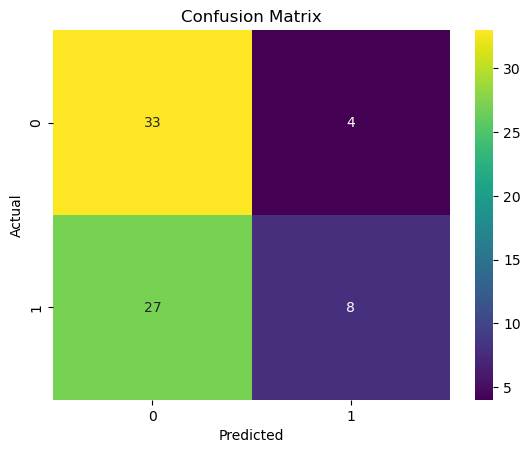

In [39]:
cm = confusion_matrix(y_test, y_pred)
cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()